In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split

from joblib import dump, load
import pickle

import os
print(os.listdir("Data"))

Acc_Sev_Dict = {0:"Donated",
                1:"No Donation"}

plt.style.use('bmh')

['Archieve', 'Data_V1.3.csv', 'Data_V1.4.csv', 'Feature_Importance.csv', 'Model_Test_Results.csv', 'OAC', 'RFE_Rank.csv', 'Supporter_Plus_GOV.csv', 'Test_Data.csv', 'Test_Data_Val.csv', 'Test_Data_Val_Aft_FE.csv', 'Train_Data.csv', 'Train_Data_Aft_FE.csv']


In [2]:
def Normalisation(X):
    X = X.values
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_norm = (X - X_mean)/X_std
    return(X_norm, X_mean, X_std)

In [3]:
df = pd.read_csv("Data/Train_Data_Aft_FE.csv", index_col ="URN")

In [4]:
df.drop(["EMAIL_FLAG"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 87281 to 72650
Data columns (total 29 columns):
DV                                    100000 non-null int64
INCOME                                9518 non-null float64
APPEAL_AVG_GIFT                       100000 non-null float64
EMERG_AVG_GIFT                        100000 non-null float64
NUM_ACTIVE_COG                        100000 non-null int64
NUM_ATTRITED_COG                      100000 non-null int64
NUM_DIFF_COG                          100000 non-null int64
TOTAL_YEARLY_CHARGE                   100000 non-null float64
TOTAL_NUM_MONTH_PAID                  100000 non-null int64
DM_PREVIOUS_12_MONTHS                 100000 non-null int64
NUM_TRANS_LST_24                      100000 non-null int64
DONATED_LST_24                        100000 non-null float64
Months Between DateCr and Last Ask    100000 non-null float64
Mosaic Group Num                      100000 non-null float64
AGE                               

In [6]:
df.head(10)

,DV,INCOME,APPEAL_AVG_GIFT,EMERG_AVG_GIFT,NUM_ACTIVE_COG,NUM_ATTRITED_COG,NUM_DIFF_COG,TOTAL_YEARLY_CHARGE,TOTAL_NUM_MONTH_PAID,DM_PREVIOUS_12_MONTHS,...,COG_TYPE_Encoded,SEXC1,TITLEC1,TOWNC1,OAC_GroupC1,Mosaic GroupC1,COG_TYPEC1,WRR_EMERG,WRR_APP,Total_C1
URN,,,,,,,,,,,,,,,,,,,,,
87281,0,NaN,0.00,0.0,0,0,0,0.00,0,-1,...,3,0,0,0,0,0,0,-1.000000,-3.000,0.000000
28497,0,NaN,55.00,0.0,0,1,0,0.00,0,-1,...,1,0,0,0,1,0,0,0.000000,1.250,1.166667
58676,0,NaN,0.00,0.0,0,1,0,0.00,0,-1,...,1,0,1,0,0,0,0,-2.000000,-3.000,1.166667
14806,0,NaN,0.00,65.0,1,0,1,120.00,456,6,...,0,0,1,0,0,0,1,2.400000,-7.000,2.333333
8548,0,NaN,81.68,50.0,1,0,1,180.00,260,6,...,0,0,0,0,0,1,1,2.333333,1.100,2.333333
86331,0,NaN,0.00,0.0,2,0,1,276.00,43,-1,...,0,0,0,0,0,0,1,-1.000000,-1.000,1.166667
8547,0,NaN,100.00,77.5,2,0,1,147.12,487,6,...,0,0,1,0,1,1,1,2.285714,2.250,4.666667
47728,0,NaN,0.00,0.0,0,1,0,0.00,0,-1,...,1,0,0,0,1,0,0,-3.000000,-3.000,1.166667
55977,0,NaN,0.00,0.0,1,0,1,237.60,108,-1,...,0,0,1,1,0,0,1,-5.000000,-3.000,3.500000


In [7]:
df = df[['Months Between DateCr and Last Ask',
'AGE',
#'Mosaic Group Num',
'SEXC1',
'TOWNC1',
'OAC_GroupC1',
'COG_TYPEC1',
'Mosaic GroupC1',
'Total_C1',
'NUM_TRANS_LST_24',
'DONATED_LST_24',
'WRR_EMERG']]

df["Recency"] = np.where((df['NUM_TRANS_LST_24']>0),1,0)

In [8]:
df_base = df.copy()

In [9]:
df_base.head(10)

,Months Between DateCr and Last Ask,AGE,SEXC1,TOWNC1,OAC_GroupC1,COG_TYPEC1,Mosaic GroupC1,Total_C1,NUM_TRANS_LST_24,DONATED_LST_24,WRR_EMERG,Recency
URN,,,,,,,,,,,,
87281,26.349617,68.5,0,0,0,0,0,0.000000,0,0.00,-1.000000,0
28497,146.335654,33.5,0,0,1,0,0,1.166667,0,0.00,0.000000,0
58676,86.441200,38.5,0,0,0,0,0,1.166667,6,117.00,-2.000000,1
14806,401.256699,63.5,0,0,0,1,0,2.333333,25,270.00,2.400000,1
8548,401.256699,68.5,0,0,0,1,1,2.333333,48,550.08,2.333333,1
86331,26.382472,38.5,0,0,0,1,0,1.166667,14,161.00,-1.000000,1
8547,401.256699,68.5,0,0,1,1,1,4.666667,48,294.24,2.285714,1
47728,362.389371,58.5,0,0,1,0,0,1.166667,4,78.00,-3.000000,1
55977,112.987946,33.5,0,1,0,1,0,3.500000,24,473.28,-5.000000,1


In [10]:
df_base = df_base.sample(frac=1, random_state=32)
df_base_train = df_base.iloc[0:75000].copy()
df_base_val = df_base.iloc[75000:100000].copy()

#df_base_val.reset_index(drop=True, inplace=True)

In [11]:
df_base_train.head(20)

,Months Between DateCr and Last Ask,AGE,SEXC1,TOWNC1,OAC_GroupC1,COG_TYPEC1,Mosaic GroupC1,Total_C1,NUM_TRANS_LST_24,DONATED_LST_24,WRR_EMERG,Recency
URN,,,,,,,,,,,,
24714,401.256699,63.5,0,1,1,0,1,3.500000,3,210.00,5.625000,1
42386,389.264667,68.5,0,0,1,1,0,2.333333,48,720.00,2.285714,1
34990,149.161174,53.5,0,1,1,1,0,3.500000,48,536.16,-1.000000,1
130804,245.261710,68.5,0,0,0,0,0,1.166667,17,170.00,1.142857,1
92934,26.283907,38.5,0,0,0,0,0,0.000000,0,0.00,-1.000000,0
25938,401.256699,63.5,0,1,1,1,0,4.666667,72,1040.02,2.285714,1
15368,401.256699,38.5,0,1,1,1,0,3.500000,24,240.00,-6.000000,1
54852,98.301813,48.5,0,1,1,0,1,4.666667,0,0.00,-4.000000,0
40803,400.928150,68.5,0,0,0,0,1,2.333333,25,229.16,-3.000000,1


In [12]:
X_norm, X_mean, X_std = Normalisation(df_base_train)
Para_Dict = {"K_mean_mean": X_mean,
             "K_mean_std": X_std}
print(Para_Dict)

{'K_mean_mean': array([ 1.70501085e+02,  5.34421733e+01,  8.63466667e-02,  2.43053333e-01,
        4.19453333e-01,  5.50466667e-01,  2.32653333e-01,  2.24493111e+00,
        1.71281200e+01,  2.57660076e+02, -1.92894201e+00,  7.50280000e-01]), 'K_mean_std': array([1.33428535e+02, 1.47838967e+01, 2.80875274e-01, 4.28927046e-01,
       4.93469588e-01, 4.97446596e-01, 4.22523088e-01, 1.59319788e+00,
       1.84600650e+01, 4.44481640e+02, 2.64556148e+00, 4.32850923e-01])}


In [13]:
with open('Parameter_Dictionary/K_means_Dict.pickle', 'wb') as handle:
    pickle.dump(Para_Dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
df_base_val.head(20)

,Months Between DateCr and Last Ask,AGE,SEXC1,TOWNC1,OAC_GroupC1,COG_TYPEC1,Mosaic GroupC1,Total_C1,NUM_TRANS_LST_24,DONATED_LST_24,WRR_EMERG,Recency
URN,,,,,,,,,,,,
49814,125.078544,38.5,0,1,1,0,0,3.500000,11,214.50,-1.000000,1
132666,233.269677,63.5,0,1,1,1,1,4.666667,24,392.16,-5.000000,1
67605,62.457135,38.5,0,0,0,0,0,0.000000,0,0.00,-3.000000,0
81906,38.243085,48.5,0,0,0,0,1,1.166667,0,0.00,0.000000,0
118587,317.279616,68.5,0,0,1,1,0,2.333333,24,471.72,-5.000000,1
5827,220.916241,38.5,0,0,1,1,0,3.500000,24,144.00,-3.000000,1
29547,401.256699,43.5,0,0,0,1,1,2.333333,50,460.00,5.833333,1
27439,161.218916,68.5,0,0,1,1,0,3.500000,24,468.00,-5.000000,1
82328,38.210230,58.5,0,0,1,1,0,2.333333,15,225.00,-2.000000,1


In [15]:
X_val = (df_base_val.values - X_mean)/X_std

In [16]:
from sklearn.cluster import KMeans

In [17]:
K_mean_error = []

for i in range(2,11):
    
    k_means = KMeans(n_clusters = i, init = "k-means++")
    k_means.fit(X_norm)

    print(k_means.inertia_)
    K_mean_error.append(k_means.inertia_)

707978.7812251864
620731.1792517931
567614.0487415136
524019.39987230516
492948.1723421915
463031.8643273159
445919.21514117345
412130.84795516066
399386.62617174647


In [18]:
K_mean_error_series = pd.Series(K_mean_error, index= np.arange(2,11,1))

Text(0.5, 1.0, 'Elbow Method')

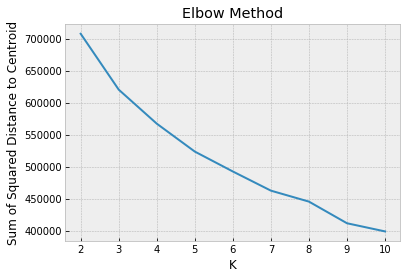

In [19]:
plt.plot(K_mean_error_series)
plt.xlabel("K")
#plt.xticks(np.arange(2,13,2))
plt.ylabel("Sum of Squared Distance to Centroid")
plt.title("Elbow Method")

In [20]:
k_means = KMeans(n_clusters = 5, init = "k-means++")
k_means.fit(X_norm)

#dump(k_means, 'Parameter_Dictionary/K-means.joblib') 
#k_means.predict(X_val)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
pd.Series(k_means.predict(X_val)).value_counts().sort_index()

0    5954
1    5569
2    7544
3    3863
4    2070
dtype: int64

In [22]:
df_base_val["Cluster"] = pd.Series(k_means.predict(X_val), index=df_base_val.index)

In [23]:
df_base_val.head(15)

,Months Between DateCr and Last Ask,AGE,SEXC1,TOWNC1,OAC_GroupC1,COG_TYPEC1,Mosaic GroupC1,Total_C1,NUM_TRANS_LST_24,DONATED_LST_24,WRR_EMERG,Recency,Cluster
URN,,,,,,,,,,,,,
49814,125.078544,38.5,0,1,1,0,0,3.500000,11,214.50,-1.000000,1,3
132666,233.269677,63.5,0,1,1,1,1,4.666667,24,392.16,-5.000000,1,1
67605,62.457135,38.5,0,0,0,0,0,0.000000,0,0.00,-3.000000,0,0
81906,38.243085,48.5,0,0,0,0,1,1.166667,0,0.00,0.000000,0,0
118587,317.279616,68.5,0,0,1,1,0,2.333333,24,471.72,-5.000000,1,1
5827,220.916241,38.5,0,0,1,1,0,3.500000,24,144.00,-3.000000,1,2
29547,401.256699,43.5,0,0,0,1,1,2.333333,50,460.00,5.833333,1,1
27439,161.218916,68.5,0,0,1,1,0,3.500000,24,468.00,-5.000000,1,1
82328,38.210230,58.5,0,0,1,1,0,2.333333,15,225.00,-2.000000,1,2


## I want to load the orginal dataset in to see what the clusters mean

In [24]:
df_orginal = pd.read_csv("Data/Train_Data.csv", index_col = "URN")
print(len(df_orginal))

100000


In [25]:
#k_means = load('Parameter_Dictionary/k-means.joblib') 

In [26]:
df_orginal.head(5)

,DV,INCOME,AGE_DESC,SEX,TITLE,TOWN,APP_CONTACTED,APP_DONOR,APPEAL_AVG_GIFT,EMERG_CONTACTED,...,Months Between DateCr and Last Ask,Mosaic Group Num,Mosaic Group,COG_TYPE,AGE,SEX_Encoded,TITLE_Encoded,TOWN_Encoded,OAC_Group_Encoded,COG_TYPE_Encoded
URN,,,,,,,,,,,,,,,,,,,,,
87281,0,NaN,Age 66-70,M,MR,COLCHESTER,3,0,0.00,1,...,26.349617,1.0,A City Prosperity,No CoG,68.5,1,35,225,14,3
28497,0,NaN,Age 31-35,F,MS,CARDIFF,4,1,55.00,0,...,146.335654,7.0,G Domestic Success,Attrited,33.5,0,48,177,17,1
58676,0,NaN,Age 36-40,F,MRS,CARDIFF,3,0,0.00,2,...,86.441200,1.0,A City Prosperity,Attrited,38.5,0,42,177,14,1
14806,0,NaN,Age 61-65,F,MRS,GLASGOW,7,0,0.00,5,...,401.256699,2.0,B Prestige Positions,Active,63.5,0,42,358,15,0
8548,0,NaN,Age 66-70,M,MR,COLCHESTER,10,1,81.68,6,...,401.256699,3.0,C Country Living,Active,68.5,1,35,225,15,0


In [27]:
df_desc = df_orginal.loc[df_base_val.index].copy()
df_desc["Cluster"] = pd.Series(k_means.predict(X_val), index=df_base_val.index).sort_index()
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 49814 to 62784
Data columns (total 33 columns):
DV                                    25000 non-null int64
INCOME                                2432 non-null float64
AGE_DESC                              25000 non-null object
SEX                                   25000 non-null object
TITLE                                 25000 non-null object
TOWN                                  25000 non-null object
APP_CONTACTED                         25000 non-null int64
APP_DONOR                             25000 non-null int64
APPEAL_AVG_GIFT                       25000 non-null float64
EMERG_CONTACTED                       25000 non-null int64
EMERG_DONOR                           25000 non-null int64
EMERG_AVG_GIFT                        25000 non-null float64
EMAIL_FLAG                            25000 non-null int64
NUM_ACTIVE_COG                        25000 non-null int64
NUM_ATTRITED_COG                      25000 non-null

In [28]:
df_desc.head(5)

,DV,INCOME,AGE_DESC,SEX,TITLE,TOWN,APP_CONTACTED,APP_DONOR,APPEAL_AVG_GIFT,EMERG_CONTACTED,...,Mosaic Group Num,Mosaic Group,COG_TYPE,AGE,SEX_Encoded,TITLE_Encoded,TOWN_Encoded,OAC_Group_Encoded,COG_TYPE_Encoded,Cluster
URN,,,,,,,,,,,,,,,,,,,,,
49814,0,NaN,Age 36-40,F,MRS,MARKET DRAYTON,0,0,0.0,1,...,7.0,G Domestic Success,Attrited,38.5,0,42,565,17,1,3
132666,0,NaN,Age 61-65,M,MR,BURY ST. EDMUNDS,5,1,120.0,5,...,3.0,C Country Living,Both,63.5,1,35,163,1,2,1
67605,0,NaN,Age 36-40,M,MR,WARRINGTON,9,1,10.0,3,...,8.0,H Aspiring Homemakers,No CoG,38.5,1,35,899,14,3,0
81906,0,NaN,Age 46-50,M,MR,CLYDEBANK,0,0,0.0,0,...,12.0,L Vintage Value,No CoG,48.5,1,35,220,20,3,0
118587,0,NaN,Age 66-70,M,MR,HAYWARDS HEATH,8,1,180.0,5,...,2.0,B Prestige Positions,Active,68.5,1,35,405,16,0,1


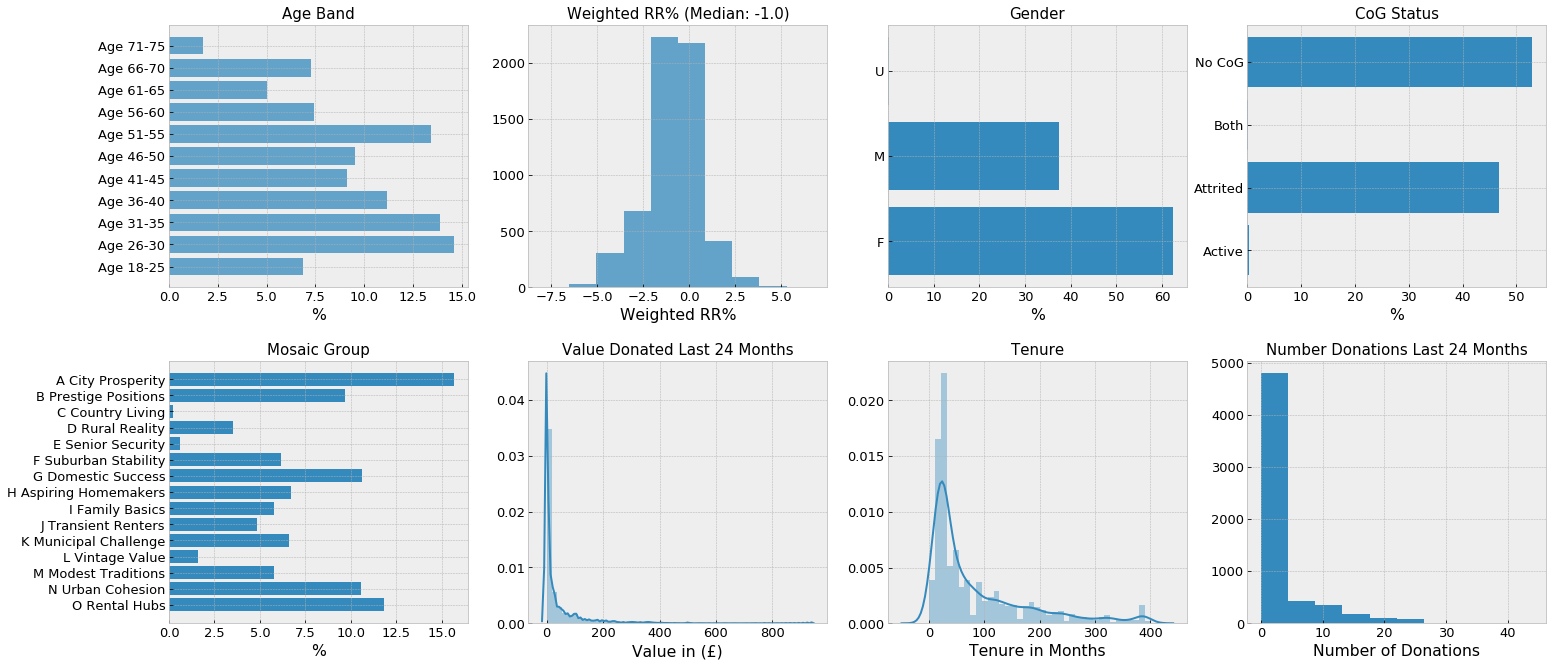

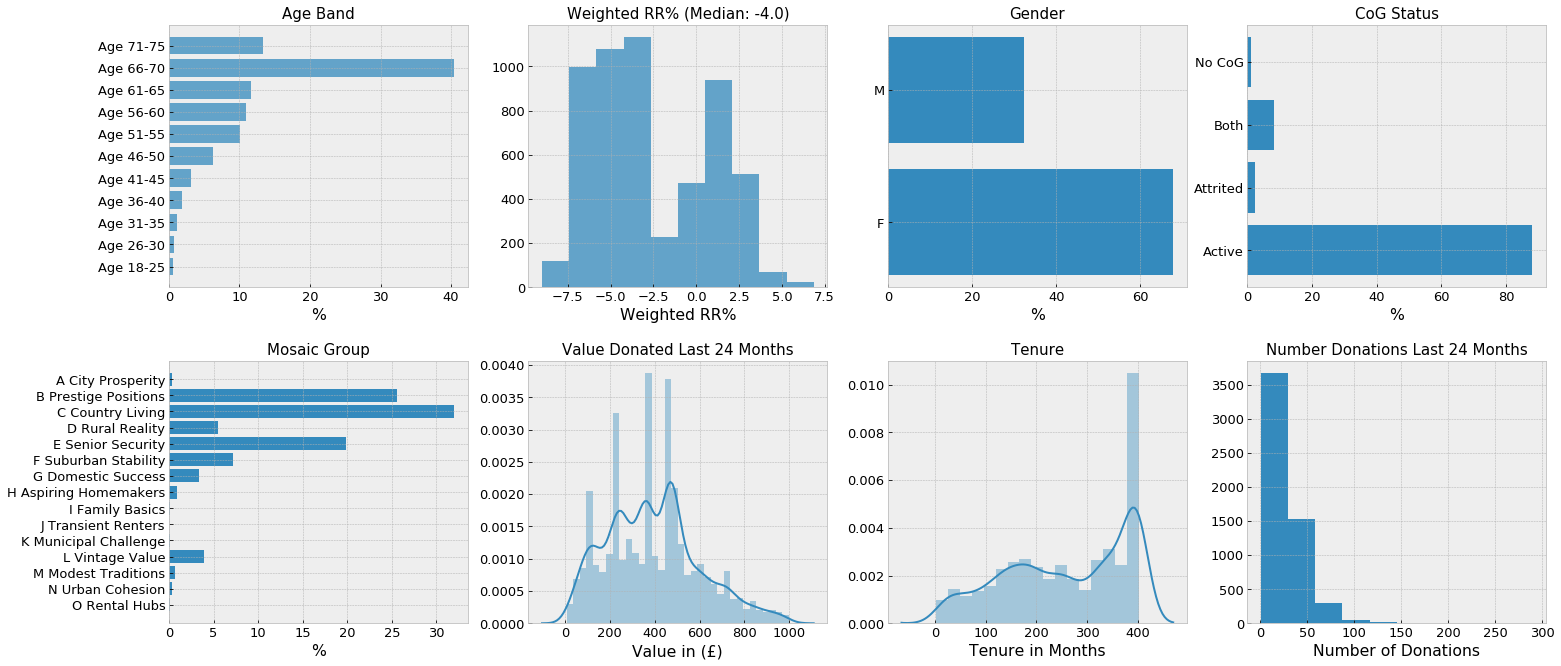

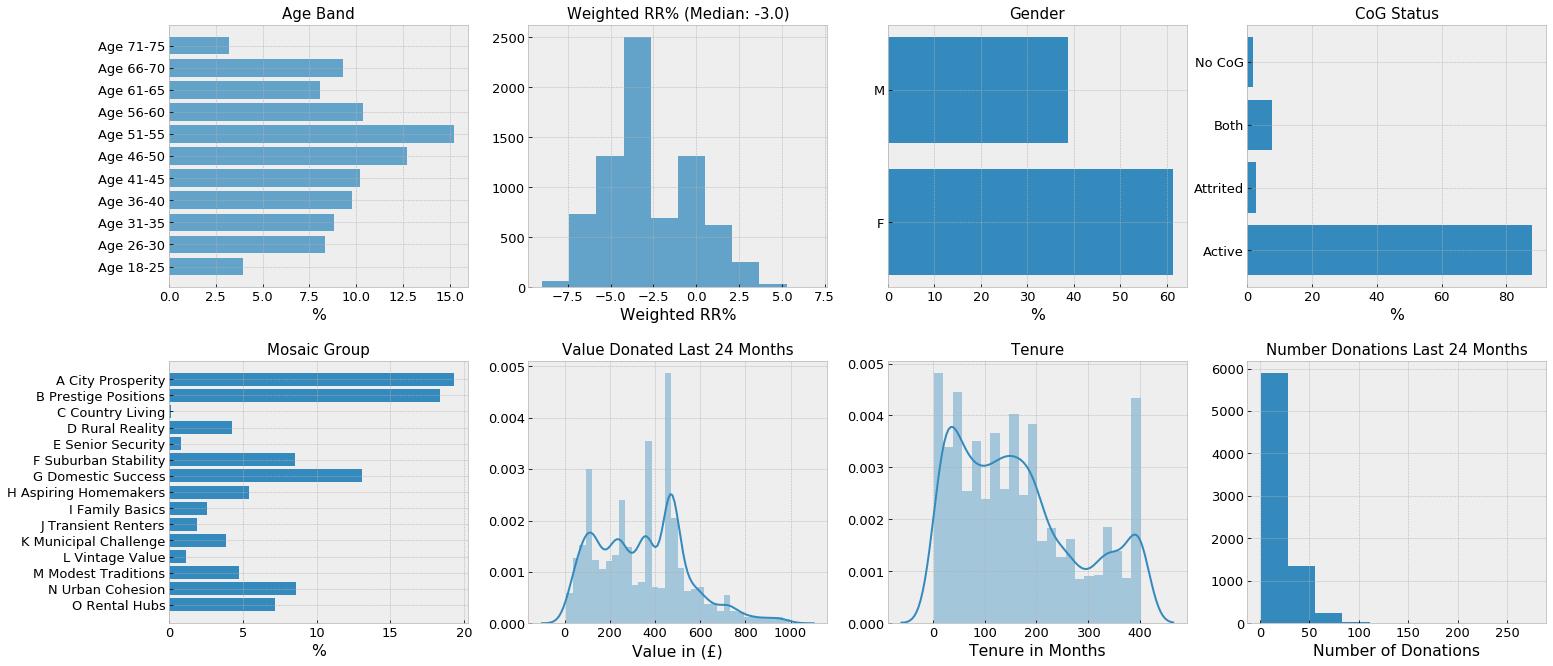

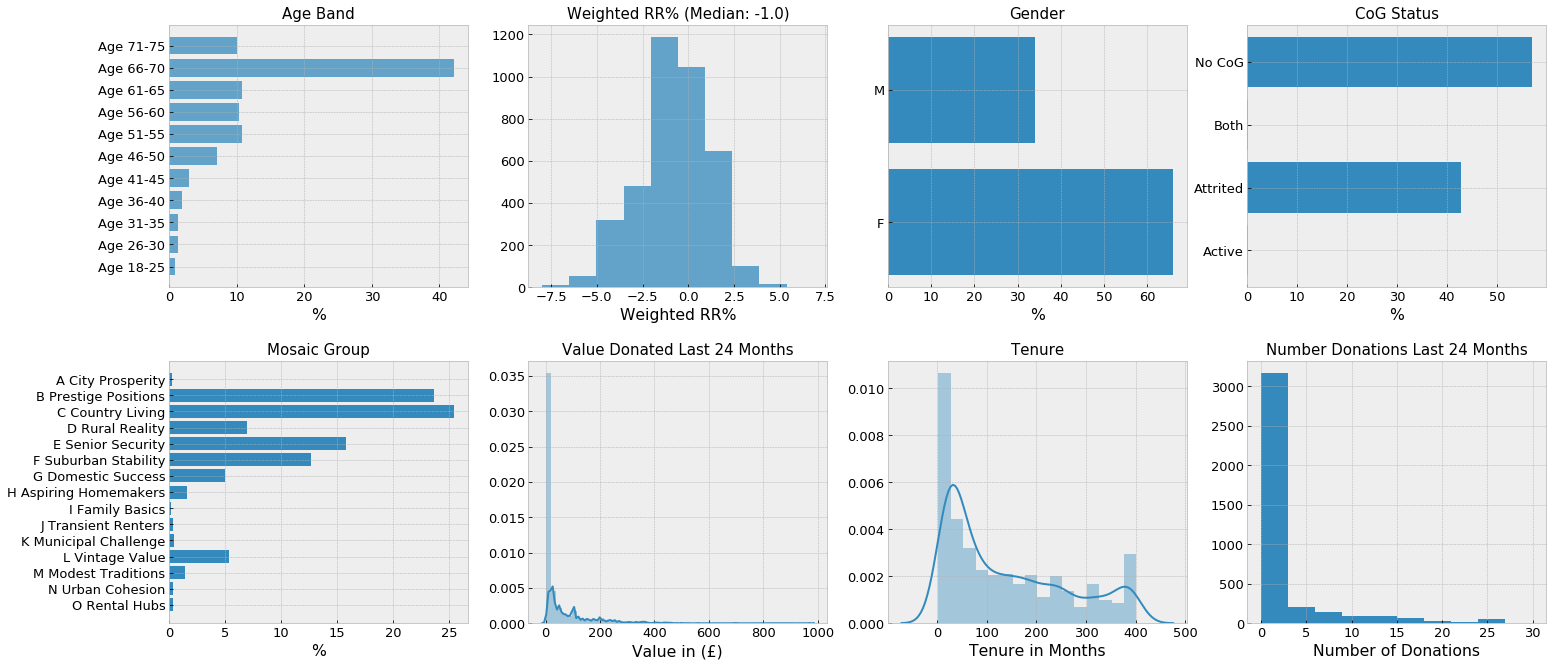

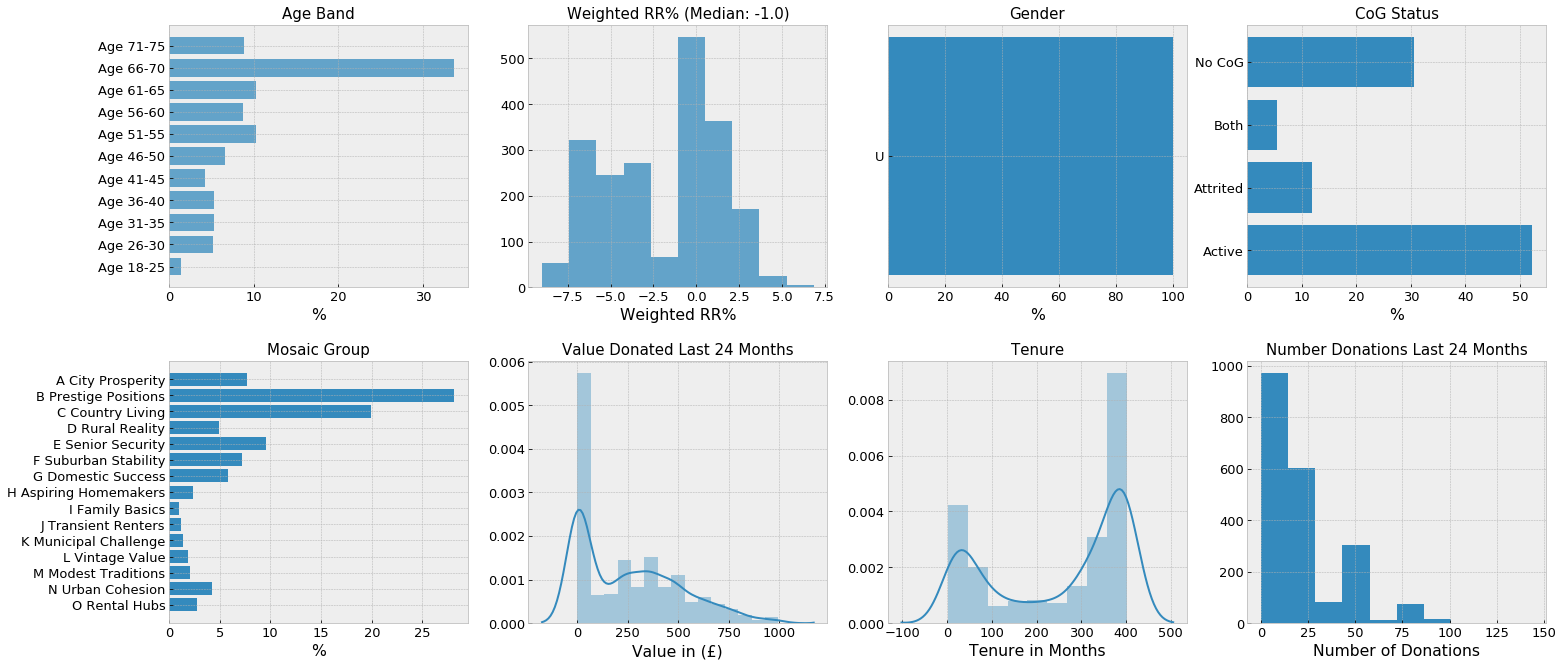

In [29]:
matplotlib.rcParams.update({'font.size': 13})
Title_font_size = 15

for i in range(0,5):
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,9))
    fig.tight_layout(h_pad=4, w_pad = 2)
    
    #fig.suptitle("Cluster: "+str(i), fontsize=14)

    AGE = df_desc["AGE_DESC"].loc[df_desc["Cluster"]==i].value_counts().sort_index()
    AGE = (AGE/ AGE.sum())*100.0
    ax[0,0].barh(AGE.astype(str).index, AGE.values, alpha=0.75)
    ax[0,0].set_title("Age Band", size=Title_font_size)
    ax[0,0].set_xlabel("%")
    

    ax[0,1].hist(df_base_val["WRR_EMERG"].loc[df_base_val["Cluster"]==i].values, alpha=0.75)
    ax[0,1].set_title("Weighted RR%"+ " (Median: " + str(df_base_val["WRR_EMERG"].loc[df_base_val["Cluster"]==i].median()) + ")", size=Title_font_size)
    ax[0,1].set_xlabel("Weighted RR%") 
    
    Gender = df_desc["SEX"].loc[df_desc["Cluster"]==i].value_counts().sort_index()
    Gender = (Gender/ Gender.sum())*100.0
    ax[0,2].barh(Gender.index, Gender.values)
    ax[0,2].set_title("Gender", size=Title_font_size)
    ax[0,2].set_xlabel("%") 

    Temp = df_desc.loc[(df_desc["DONATED_LST_24"] < 1000) & (df_desc["Cluster"]==i), "DONATED_LST_24"]
    sns.distplot(Temp.values ,ax=ax[1,1])
    ax[1,1].set_title("Value Donated Last 24 Months", size=Title_font_size)
    ax[1,1].set_xlabel("Value in (£)")
    Temp = None

    OAC_Group = df_desc["Mosaic Group"].loc[df_desc["Cluster"]==i].value_counts().sort_index(ascending=False)
    OAC_Group = (OAC_Group/ OAC_Group.sum())*100.0
    ax[1,0].barh(OAC_Group.index, OAC_Group.values)
    ax[1,0].set_title("Mosaic Group", size=Title_font_size)
    ax[1,0].set_xlabel("%")

    sns.distplot(df_desc["Months Between DateCr and Last Ask"].loc[df_desc["Cluster"]==i].values ,ax=ax[1,2])
    ax[1,2].set_title("Tenure", size=Title_font_size)
    ax[1,2].set_xlabel("Tenure in Months")

    COG_Type = df_desc["COG_TYPE"].loc[df_desc["Cluster"]==i].value_counts().sort_index()
    COG_Type = (COG_Type/ COG_Type.sum())*100.0
    ax[0,3].barh(COG_Type.index, COG_Type.values)
    ax[0,3].set_title("CoG Status", size=Title_font_size)
    ax[0,3].set_xlabel("%") 


    Temp = df_desc.loc[(df_desc["NUM_TRANS_LST_24"] < 2000) & (df_desc["Cluster"]==i), "NUM_TRANS_LST_24"]
    ax[1,3].hist(Temp.values)
    ax[1,3].set_title("Number Donations Last 24 Months", size=Title_font_size)
    ax[1,3].set_xlabel("Number of Donations") 
    Temp = None
    
    #fig.savefig("K-mean Clusters/cluster_"+str(i)+".png",bbox_inches='tight')
